# PEPCONF - Throughput Troubleshooting

In [1]:
import sys
sys.path.append('../../management/')

In [2]:
import management as mgt
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
from qcportal import FractalClient

In [5]:
client = FractalClient.from_file()

In [6]:
ds = client.get_collection("OptimizationDataset", "OpenFF PEPCONF OptimizationDataset v1.0")

In [7]:
ds.status('default')

,default
ERROR,4491
COMPLETE,1594
INCOMPLETE,1475


In [8]:
ds.df

,default
CC(=O)N[C@@H](CCC(=O)[O-])C(=O)N[C@@H](Cc1ccccc1)C(N)=O-0,"OptimizationRecord(id='31712605', status='COMP..."
CC(=O)N[C@@H](CCC(=O)[O-])C(=O)N[C@@H](Cc1ccccc1)C(N)=O-1,"OptimizationRecord(id='31712606', status='COMP..."
CC(=O)N[C@@H](CO)C(=O)N[C@@H](CO)C(N)=O-0,"OptimizationRecord(id='31712607', status='COMP..."
CC[C@H](C)[C@H](NC(C)=O)C(=O)N[C@@H](Cc1ccccc1)C(N)=O-0,"OptimizationRecord(id='31712608', status='COMP..."
CC[C@H](C)[C@H](NC(C)=O)C(=O)N[C@@H](Cc1ccccc1)C(N)=O-1,"OptimizationRecord(id='31712609', status='COMP..."
...,...
CC(C)C[C@@H]1NC(=O)[C@H](C)NC(=O)[C@@H]2CCCN2C(=O)[C@H](CC(C)C)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC(C)C)NC1=O-8,"OptimizationRecord(id='31729737', status='ERROR')"
CC(C)C[C@@H]1NC(=O)[C@H](C)NC(=O)[C@@H]2CCCN2C(=O)[C@H](CC(C)C)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC(C)C)NC1=O-9,"OptimizationRecord(id='31729738', status='ERROR')"
CC(C)C[C@@H]1NC(=O)[C@H](C)NC(=O)[C@@H]2CCCN2C(=O)[C@H](CC(C)C)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC(C)C)NC1=O-10,"OptimizationRecord(id='31729739', status='INCO..."
CC(C)C[C@@H]1NC(=O)[C@H](C)NC(=O)[C@@H]2CCCN2C(=O)[C@H](CC(C)C)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](C(C)C)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC(C)C)NC1=O-11,"OptimizationRecord(id='31729740', status='ERROR')"


In [9]:
opts = ds.df.default.tolist()

In [10]:
prov = {opt.id: opt.provenance.dict() for opt in opts if opt.provenance}

In [11]:
df_prov = pd.DataFrame(prov).T
df_prov

,creator,version,routine,wall_time,hostname,username,qcengine_version,cpu
31712605,geomeTRIC,0.9.7.2,geometric.run_json.geometric_run_json,14458.4,hpc3-14-25,tgokey,v0.17.0,Intel(R) Xeon(R) Gold 6148 CPU @ 2.40GHz
31712606,geomeTRIC,0.9.7.2,geometric.run_json.geometric_run_json,9155.42,hpc3-14-07,tgokey,v0.17.0,Intel(R) Xeon(R) Gold 6148 CPU @ 2.40GHz
31712607,geomeTRIC,0.9.7.2,geometric.run_json.geometric_run_json,9434.58,lu10,chodera,v0.17.0,Intel(R) Xeon(R) CPU E5-2697 v4 @ 2.30GHz
31712608,geomeTRIC,0.9.7.2,geometric.run_json.geometric_run_json,6191.12,ls02,chodera,v0.17.0,Intel(R) Xeon(R) CPU E5-2697 v4 @ 2.30GHz
31712609,geomeTRIC,0.9.7.2,geometric.run_json.geometric_run_json,7273.11,lt18,chodera,v0.17.0,Intel(R) Xeon(R) CPU E5-2697 v4 @ 2.30GHz
...,...,...,...,...,...,...,...,...
31720066,geomeTRIC,0.9.7.2,geometric.run_json.geometric_run_json,83312.9,openff-qca-qm-64d6594946-vqd78,qcfractal,v0.17.0,AMD EPYC 7402P 24-Core Processor
31720208,geomeTRIC,0.9.7.2,geometric.run_json.geometric_run_json,168208,openff-qca-qm-9956ffc8c-zdprj,qcfractal,v0.17.0,Intel(R) Xeon(R) CPU E5-1660 v4 @ 3.20GHz
31720452,geomeTRIC,0.9.7.2,geometric.run_json.geometric_run_json,82920.3,lt14,chodera,v0.17.0,Intel(R) Xeon(R) CPU E5-2697 v4 @ 2.30GHz
31728982,geomeTRIC,0.9.7.2,geometric.run_json.geometric_run_json,16927.2,hpc3-17-15,tgokey,v0.17.0,Intel(R) Xeon(R) Gold 6148 CPU @ 2.40GHz


In [12]:
df_prov.username.value_counts()

chodera           584
tgokey            561
qcfractal         427
openforcefield     22
Name: username, dtype: int64

In [13]:
df_prov['wall_time_hours'] = df_prov.wall_time.astype(float)/3600

In [26]:
name_map = {'chodera': 'Lilac',
            'qcfractal': 'PRP',
            'tgokey': 'UCI',
            'openforcefield': 'UCI'}

In [17]:
df_prov['resource'] = df_prov['username'].apply(lambda x: name_map[x])

## Walltime distributions by resource

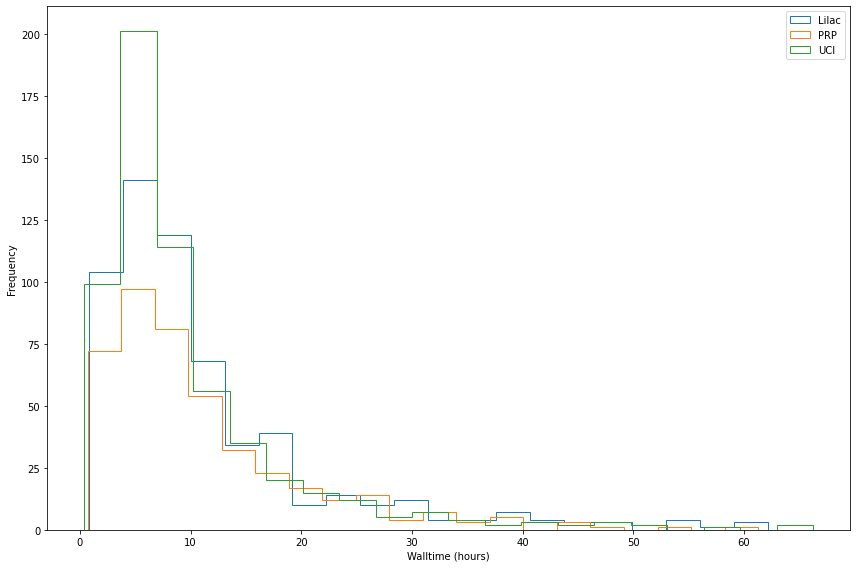

In [18]:
fig, ax = plt.subplots()

(df_prov.groupby('resource').wall_time_hours).plot.hist(bins=20, histtype='step', legend=True, figsize=(12, 8), ax=ax)

ax.set_xlabel("Walltime (hours)")

fig.tight_layout()
fig.savefig('walltime.pdf', dpi=300)

In [19]:
df_prov.wall_time_hours.describe()

count    1594.000000
mean       10.644156
std         9.699959
min         0.353987
25%         4.651553
50%         7.490459
75%        12.936817
max        66.259650
Name: wall_time_hours, dtype: float64

In [20]:
df_prov.wall_time_hours.sum()/24

706.9493743237053

## Measuring Throughput

In [21]:
modified_on = {opt.id: opt.modified_on for opt in opts if opt.provenance}

In [22]:
df_prov['modified_on'] = pd.Series(modified_on)

In [23]:
df_prov.modified_on.describe()

/home/david/.conda/envs/qcsubmit-2/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                           1594
unique                          1571
top       2020-11-24 02:23:46.559850
freq                               3
first     2020-11-14 21:17:24.092340
last      2020-12-02 00:36:41.499363
Name: modified_on, dtype: object

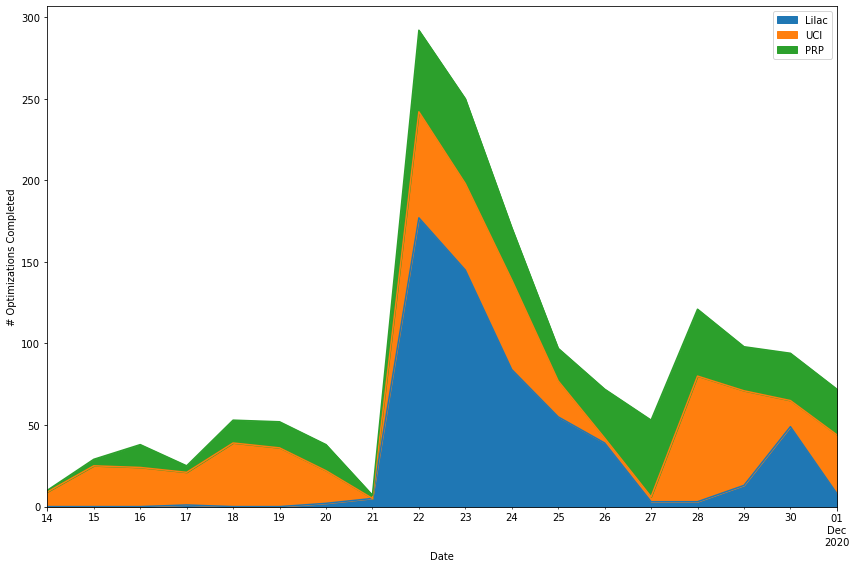

In [27]:
fig, ax = plt.subplots(figsize=(12, 8))

counts = {}
for name, group in df_prov.reset_index().set_index('modified_on').groupby('username'):
    counts[name_map[name]] = group.groupby((pd.Grouper(freq='D')))['index'].count()

counts = pd.DataFrame(counts)
counts.plot.area(ax=ax)
ax.legend()

ax.set_ylabel("# Optimizations Completed")
ax.set_xlabel("Date")

fig.tight_layout()
fig.savefig('throughput.pdf', dpi=300)

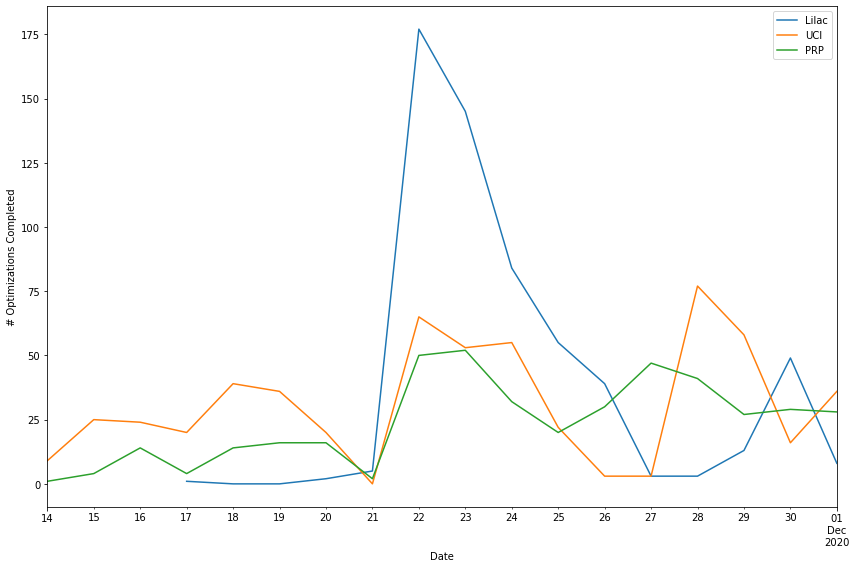

In [28]:
fig, ax = plt.subplots(figsize=(12, 8))

counts = {}
for name, group in df_prov.reset_index().set_index('modified_on').groupby('username'):
    counts[name_map[name]] = group.groupby((pd.Grouper(freq='D')))['index'].count()

counts = pd.DataFrame(counts)
counts.plot(ax=ax)
ax.legend()

ax.set_ylabel("# Optimizations Completed")
ax.set_xlabel("Date")

fig.tight_layout()
fig.savefig('success-individual.pdf', dpi=300)

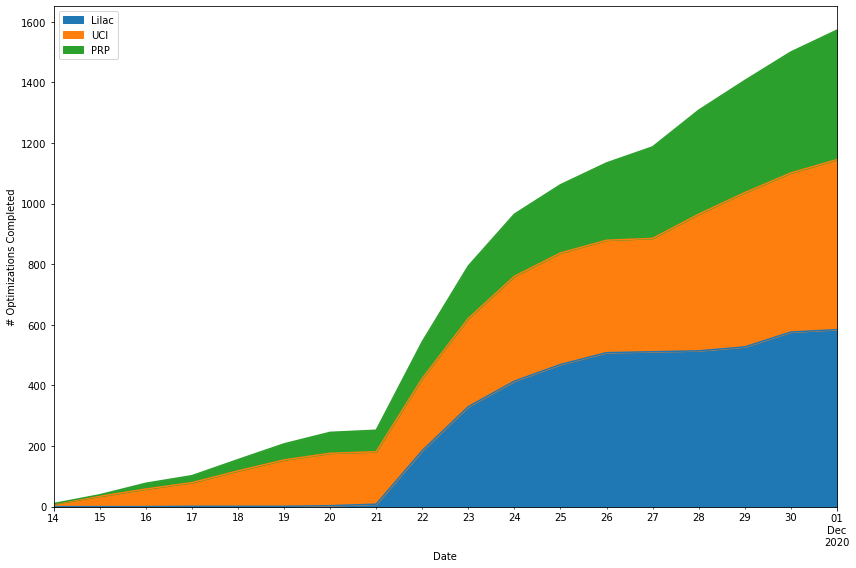

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))

counts = {}
for name, group in df_prov.reset_index().set_index('modified_on').groupby('username'):
    counts[name_map[name]] = group.groupby((pd.Grouper(freq='D')))['index'].count()

counts = pd.DataFrame(counts).fillna(0).cumsum()
counts.plot.area(ax=ax)
ax.legend()

ax.set_ylabel("# Optimizations Completed")
ax.set_xlabel("Date")

fig.tight_layout()
fig.savefig('throughput_cumulative.pdf', dpi=300)

## Findings and Recommendations

Findings:
1. Throughput is increasing on this dataset.
2. Trevor's managers are largely responsible for this dataset's advancement.
3. Mean execution time across resources is 13 hours. Can vary upward by up to 60 hours.

Recommendations:
1. Up priority to "high" for this dataset for now. Examine if this increases throughput for each resource.
2. It is not clear why Lilac's contribution is so low. We should review the manager configuration of the QM workers to ensure they aren't being killed by the cluster scheduler. It could also be the case that pre-emption on Lilac is costing us successes.

## Upping priority

In [30]:
incomplete = [opt for opt in opts if opt.status != 'COMPLETE']

In [31]:
len(incomplete)

5966

In [34]:
mgt.reprioritize_optimizations(incomplete, client, "normal")

Reprioritized result`31712615` with `normal
Reprioritized result`31712617` with `normal
Reprioritized result`31712618` with `normal
Reprioritized result`31712853` with `normal
Reprioritized result`31712858` with `normal
Reprioritized result`31712866` with `normal
Reprioritized result`31712877` with `normal
Reprioritized result`31712880` with `normal
Reprioritized result`31712921` with `normal
Reprioritized result`31712923` with `normal
Reprioritized result`31712926` with `normal
Reprioritized result`31712927` with `normal
Reprioritized result`31712928` with `normal
Reprioritized result`31712933` with `normal
Reprioritized result`31712940` with `normal
Reprioritized result`31712947` with `normal
Reprioritized result`31712980` with `normal
Reprioritized result`31712987` with `normal
Reprioritized result`31712990` with `normal
Reprioritized result`31712998` with `normal
Reprioritized result`31712999` with `normal
Reprioritized result`31713006` with `normal
Reprioritized result`31713013` w